In [1]:
import numpy as np
import gudhi
import matplotlib
from matplotlib import pyplot as plt

In [2]:
s=[984,1662,1170,1476,1394,1466,1034,1082,1178,928]  

In [3]:

def trivialTriangle(particle_ids, force):
# particle_ids: a list of particle ids in contact; dimension: N*2
# force: list of contact force;dimension: N*1
# trivial: list, n*4
    trivialLoops = []
    id_len = len(particle_ids)
    for idx,item in enumerate(particle_ids):
        id1 = item[0]
        id2 = item[1]
        force12 = force[idx]    
        id1_set = set()
        id2_set = set()   
        for i in range(idx+1,id_len):
            l2 = particle_ids[i]
            if id1 in l2:
                id3 = l2[l2!=id1]
                id1_set.add(id3)
                
            if id2 in l2:
                id3 = l2[l2!=id2]
                id2_set.add(id3)
        #print(id1_set)
        
        common_id3 = id1_set & id2_set
        len_common = len(common_id3)
        #print(common_id3)
        if len_common > 0:
            #print(len_common)
            for id3 in common_id3:
                #print(id3)
                for j in range(idx+1,len(particle_ids)):
                    if set([id1,id3]) == set(particle_ids[j]):
                        force13 = force[j]
                    if set([id2,id3]) == set(particle_ids[j]):
                        force23 = force[j]
                        
                fmin = min(force12,force13,force23)
                trivialLoops.append([id1,id2,id3,fmin])
    return trivialLoops





In [6]:

###107,108

for idx in range(1,s[4]):
    file_name = ('../simulation_data/New_data/DATA/s13/' + 'force_contact_' + '%06d.dat' % idx)
    data=np.loadtxt(file_name)
    #id_1 = data[:,0]
    #id_2 = data[:,1]
    force = np.sqrt((data[i,4])**2+(data[i,5])**2)
    particle_id=[]
    cond_f=[]
    id1=[]
    id2=[]
    for i in range(0,len(force)):
        if force[i]!=0.0:
            if (data[i,0]>0 and data[i,1]>0):
                cond_f.append(np.sqrt((data[i,4])**2+(data[i,5])**2))
                id1.append(data[i,0])
                id2.append(data[i,1])
    cond_force=np.array(cond_f)
    id_1=np.array(id1)
    id_2=np.array(id2)
    for i in range(0,len(id_1)):
        particle_id.append([id_1[i],id_2[i]])
    pid=np.array(particle_id)
    #print(pid)
    particle_ids=pid.tolist()
    #print(particle_ids)
    contact_force=cond_force.tolist()
    #print(contact_force)
    # find the trivial loops
    trivialLoops = trivialTriangle(particle_ids, contact_force)
    #print(trivialLoops)
    # construct simplex trees
    contact_length = len(contact_force)
    loops_length = len(trivialLoops)
    
    st = gudhi.SimplexTree()
    for i in range(contact_length):
        st.insert(particle_ids[i], filtration = - contact_force[i])
            
    for i in range(loops_length):
        st.insert(trivialLoops[i][0:3], filtration = -trivialLoops[i][3])

    st.initialize_filtration()
    diag = st.persistence(11, 0.0, persistence_dim_max = True)
    #B0 = st.persistence_intervals_in_dimension(0)
    B1 = st.persistence_intervals_in_dimension(1)
    #print(B1)
    B1_births = [] 
    B1_deaths = [] 
    for ind, item in enumerate(B1):
        B1_births.append(-item[0])
        B1_deaths.append(-item[1])
    for i, item in enumerate(B1_deaths):
        if np.isinf(item):
            B1_deaths[i] = 0.0
            
    births_np = np.array(B1_births)
    deaths_np = np.array(B1_deaths)
    plt.scatter(B1_births,B1_deaths)
    plt.xlabel('Birth')
    plt.ylabel('Death')
    plt.title('frame'+str(idx))
    plt.savefig('../simulation_data/B1/s13/'+ str(idx)+'.png', dpi=800)
    plt.close()
    plt.show()

94


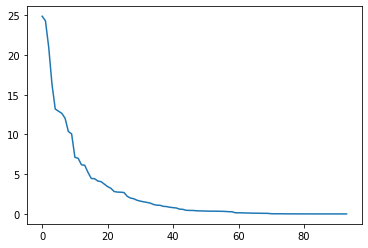